In [1]:
import os 
import pandas as pd
import numpy as np
from scipy import ndimage
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data=pd.read_table('TV2_003.tsv', on_bad_lines='skip')
#data
print(len(data))

207


In [3]:
#data.loc[:,['Tx.1','Ty.1','Tz.1']]

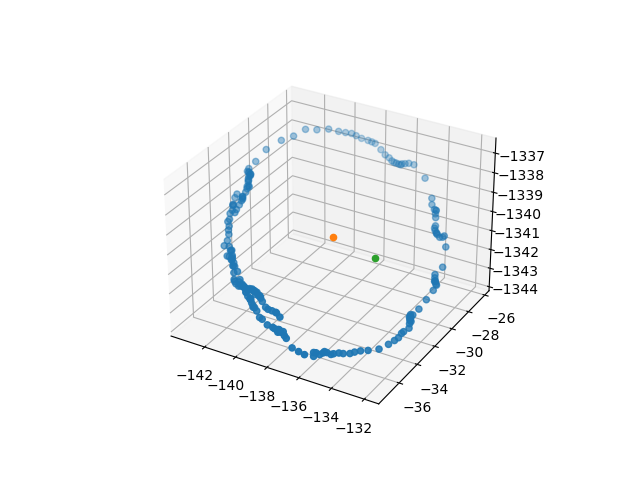

In [4]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(data.loc[:,['Tx.1']], data.loc[:,['Ty.1']], data.loc[:,['Tz.1']]);
ax.scatter3D((data['Tx.1'].max()+data['Tx.1'].min())/2,
              (data['Ty.1'].max()+data['Ty.1'].min())/2,
              (data['Tz.1'].max()+data['Tz.1'].min())/2);
ax.scatter3D(data['Tx.5'].mean(),data['Ty.5'].mean(),data['Tz.5'].mean())
plt.show()

In [5]:
print('calculated center (x,y,z) : ({}, {}, {})'.format((data['Tx.1'].max()+data['Tx.1'].min())/2,
              (data['Ty.1'].max()+data['Ty.1'].min())/2,
              (data['Tz.1'].max()+data['Tz.1'].min())/2))
print('marker position (x,y,z) : ({}, {}, {})'.format(data['Tx.5'].mean(),data['Ty.5'].mean(),data['Tz.5'].mean()))

calculated center (x,y,z) : (-137.6715, -31.820999999999998, -1340.2295)
marker position (x,y,z) : (-135.535502415459, -30.881241545893705, -1341.1697729468601)


In [6]:
print('distance between the calculated center and the marker position in = {} mm'.format(np.sqrt((data['Tx.5'].mean()-(data['Tx.1'].max()+data['Tx.1'].min())/2)**2+(data['Ty.5'].mean()-(data['Ty.1'].max()+data['Ty.1'].min())/2)**2+(data['Tz.5'].mean()-(data['Tz.1'].max()+data['Tz.1'].min())/2)**2)))
d_cal_pos=np.sqrt((data['Tx.5'].mean()-(data['Tx.1'].max()+data['Tx.1'].min())/2)**2+(data['Ty.5'].mean()-(data['Ty.1'].max()+data['Ty.1'].min())/2)**2+(data['Tz.5'].mean()-(data['Tz.1'].max()+data['Tz.1'].min())/2)**2)

distance between the calculated center and the marker position in = 2.5158984176286645 mm


In [7]:
data_after=pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')
#data_after

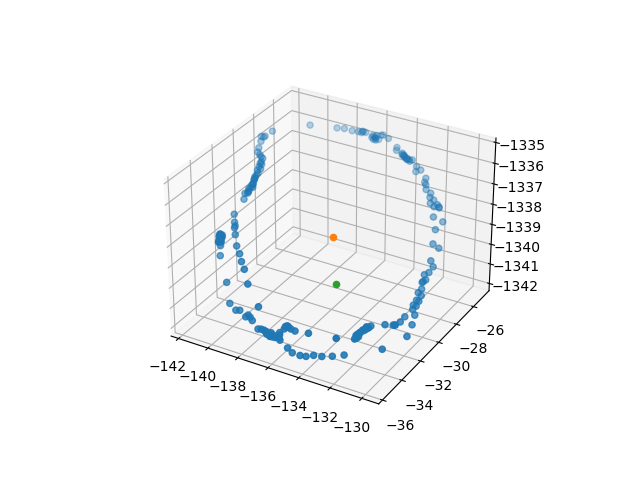

In [8]:
fig = plt.figure()
#ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
#data.loc[:,['Tx.1']]
ax.scatter3D(data_after.loc[:,['Tx']], data_after.loc[:,['Ty']], data_after.loc[:,['Tz']], cmap='Greens');
ax.scatter3D((data_after['Tx'].max()+data_after['Tx'].min())/2,
              (data_after['Ty'].max()+data_after['Ty'].min())/2,
              (data_after['Tz'].max()+data_after['Tz'].min())/2);
ax.scatter3D(data_after['Tx.4'].mean(),
             data_after['Ty.4'].mean(),
             data_after['Tz.4'].mean())
#ax.scatter3D(pd.read_table('TV2_torso_000.tsv', on_bad_lines='skip')['Tx.3'].mean(),pd.read_table('TV2_torso_000.tsv', on_bad_lines='skip')['Ty.3'].mean(),pd.read_table('TV2_torso_000.tsv', on_bad_lines='skip')['Tz.3'].mean())
#ax.scatter3D(data.loc[:,['Tx.1']], data.loc[:,['Ty.1']], data.loc[:,['Tz.1']], cmap='Greens');


In [9]:
print('calculated center after manual repositioning (x,y,z) : ({}, {}, {})'.format((data_after['Tx'].max()+data_after['Tx'].min())/2,
              (data_after['Ty'].max()+data_after['Ty'].min())/2,
              (data_after['Tz'].max()+data_after['Tz'].min())/2))
print('marker position after manual repositioning (x,y,z) : ({}, {}, {})'.format(data_after['Tx.4'].mean(),data_after['Ty.4'].mean(),data_after['Tz.4'].mean()))

calculated center after manual repositioning (x,y,z) : (-135.73000000000002, -30.258499999999998, -1338.5815)
marker position after manual repositioning (x,y,z) : (-134.76331400966194, -31.495685990338163, -1340.1650386473427)


In [10]:
print('distance between the calculated center after manual repositioning and the marker position after manual repositioning in = {} mm'.format(np.sqrt((data_after['Tx.4'].mean()-(data_after['Tx'].max()+data_after['Tx'].min())/2)**2+(data_after['Ty.4'].mean()-(data_after['Ty'].max()+data_after['Ty'].min())/2)**2+(data_after['Tz.4'].mean()-(data_after['Tz'].max()+data_after['Tz'].min())/2)**2)))
d_cal_af_pos_af=np.sqrt((data_after['Tx.4'].mean()-(data_after['Tx'].max()+data_after['Tx'].min())/2)**2+(data_after['Ty.4'].mean()-(data_after['Ty'].max()+data_after['Ty'].min())/2)**2+(data_after['Tz.4'].mean()-(data_after['Tz'].max()+data_after['Tz'].min())/2)**2)

distance between the calculated center after manual repositioning and the marker position after manual repositioning in = 2.2299564180120095 mm


In [11]:
print('distance between the calculated center and the calculated center after manual repositioning in = {} mm'.format(np.sqrt(((data_after['Tx'].max()+data_after['Tx'].min())/2-(data['Tx.1'].max()+data['Tx.1'].min())/2)**2+((data_after['Ty'].max()+data_after['Ty'].min())/2-(data['Ty.1'].max()+data['Ty.1'].min())/2)**2+((data_after['Tz'].max()+data_after['Tz'].min())/2-(data['Tz.1'].max()+data['Tz.1'].min())/2)**2)))
d_cal_cal_af=np.sqrt(((data_after['Tx'].max()+data_after['Tx'].min())/2-(data['Tx.1'].max()+data['Tx.1'].min())/2)**2+((data_after['Ty'].max()+data_after['Ty'].min())/2-(data['Ty.1'].max()+data['Ty.1'].min())/2)**2+((data_after['Tz'].max()+data_after['Tz'].min())/2-(data['Tz.1'].max()+data['Tz.1'].min())/2)**2)

distance between the calculated center and the calculated center after manual repositioning in = 2.9877637958847534 mm


In [12]:
d_pos_pos_after=np.sqrt((data_after['Tx.4'].mean()-data['Tx.5'].mean())**2+
                        (data_after['Ty.4'].mean()-data['Ty.5'].mean())**2+
                        (data_after['Tz.4'].mean()-data['Tz.5'].mean())**2)
print('distance between the marker position and the marker position after manual repositioning in = {} mm'.format(d_pos_pos_after))
f = open("TV2_3.txt", "w")
f.write("{}\n{}\n{}\n{}\n".format(d_cal_pos,d_cal_af_pos_af,d_cal_cal_af,d_pos_pos_after))
f.close()

distance between the marker position and the marker position after manual repositioning in = 1.4082996563170729 mm


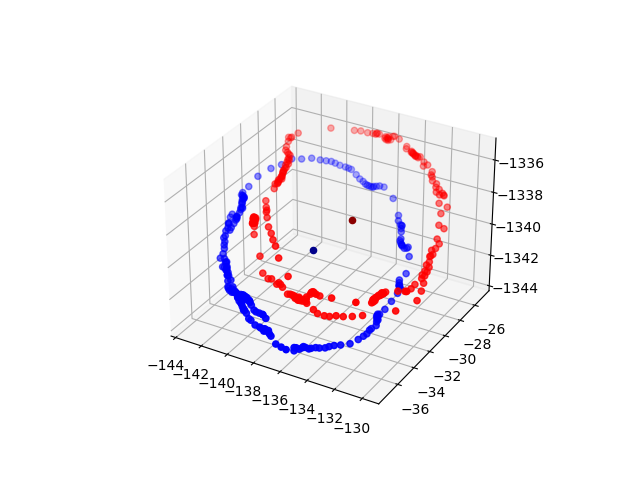

In [13]:
fig = plt.figure()
#ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
#data.loc[:,['Tx.1']]
ax.scatter3D(data_after.loc[:,['Tx']], data_after.loc[:,['Ty']], data_after.loc[:,['Tz']], c='red');
ax.scatter3D((data_after['Tx'].max()+data_after['Tx'].min())/2,
              (data_after['Ty'].max()+data_after['Ty'].min())/2,
              (data_after['Tz'].max()+data_after['Tz'].min())/2, c='darkred');

ax.scatter3D(data.loc[:,['Tx.1']], data.loc[:,['Ty.1']], data.loc[:,['Tz.1']], c='blue');
ax.scatter3D((data['Tx.1'].max()+data['Tx.1'].min())/2,
              (data['Ty.1'].max()+data['Ty.1'].min())/2,
              (data['Tz.1'].max()+data['Tz.1'].min())/2, c='darkblue');